In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sb
import seaborn as sns

In [36]:
df = pd.read_csv("bank.csv",delimiter=";")
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [37]:
df2= df[['y','job','marital','default','housing','poutcome']]

In [38]:
df2

,y,job,marital,default,housing,poutcome
0,no,unemployed,married,no,no,unknown
1,no,services,married,no,yes,failure
2,no,management,single,no,yes,failure
3,no,management,married,no,yes,unknown
4,no,blue-collar,married,no,yes,unknown
...,...,...,...,...,...,...
4516,no,services,married,no,yes,unknown
4517,no,self-employed,married,yes,yes,unknown
4518,no,technician,married,no,no,unknown
4519,no,blue-collar,married,no,no,other


In [39]:
df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])

In [40]:
df3

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,0
2,no,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
3,no,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,no,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4517,no,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4518,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4519,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0


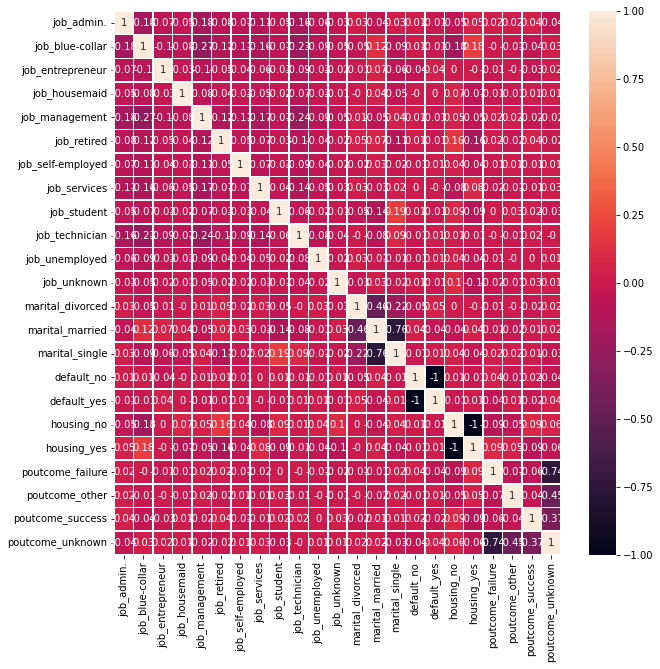

In [41]:
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(data=df3.corr().round(2), annot=True, linewidths=.5, ax=ax)
plt.show()

In [42]:
df3.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [43]:
#df3.loc[:, df.columns != y]
x = df3[[ 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]
y = df3['y']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [44]:
print(X_train.shape)

(3390, 23)


# Setup logistic regression model

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
#tn, fp, fn, tp

[[990   3]
 [117  21]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


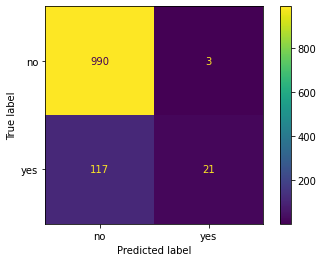

In [48]:
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8938992042440318


#  k-nearest neighbors model

In [52]:
classifier = KNeighborsClassifier(n_neighbors=3)
#Use k=3
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


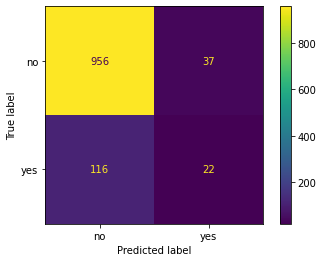

In [53]:
metrics.plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      0.96      0.93       993
         yes       0.37      0.16      0.22       138

    accuracy                           0.86      1131
   macro avg       0.63      0.56      0.57      1131
weighted avg       0.83      0.86      0.84      1131



From the accuracy we can see the logistics model is more accurate.